<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



In [ ]:
from embedding_basics.sv_ray_cluster_api import embed_image


Batch 0 to 50 processed successfully


## Sample access of a multi-modal model on the SV Ray cluster for generating embeddings
Note that we can also modify the model name below to some other multi-modal model (such as `sentence-transformers/clip-ViT-B-32`) and the code will still work.

In [ ]:

data_images = [
    "https://supportvectors.ai/logo-poster-transparent.png",
    "/Users/chandarl/data/other_images/chandar.webp"
]
data_texts = [
    "SupportVectors offers courses on AI/ML",
]
siglip_model_name = "google/siglip2-base-patch16-224"
siglip_embeddings = embed_image(data_images, data_texts, siglip_model_name, batch_size=50)

## Demonstration of clustering of the embeddings generated from `cifar10` dataset

In [3]:
from datasets import load_dataset
from pathlib import Path
import random
import tempfile

# Load a public dataset and sample ~1000 random images
cifar10 = load_dataset("cifar10", split="train")
rng = random.Random(42)
sample_indices = rng.sample(range(len(cifar10)), 1000)
sampled_cifar10 = cifar10.select(sample_indices)

label_names = cifar10.features["label"].names
image_dir = Path(tempfile.gettempdir()) / "cifar10_sample_images"
image_dir.mkdir(parents=True, exist_ok=True)

image_paths = []
image_labels = []
for i, item in enumerate(sampled_cifar10):
    image = item["img"]
    label = label_names[item["label"]]
    image_path = image_dir / f"cifar10_{i:04d}.png"
    image.save(image_path)
    image_paths.append(str(image_path))
    image_labels.append(label)

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [4]:
siglip_model_name = "google/siglip2-base-patch16-224"
# Embed only images (no text)
siglip_image_embeddings = embed_image(image_paths, [], siglip_model_name, batch_size=50)

Batch 0 to 50 processed successfully
Batch 50 to 100 processed successfully
Batch 100 to 150 processed successfully
Batch 150 to 200 processed successfully
Batch 200 to 250 processed successfully
Batch 250 to 300 processed successfully
Batch 300 to 350 processed successfully
Batch 350 to 400 processed successfully
Batch 400 to 450 processed successfully
Batch 450 to 500 processed successfully
Batch 500 to 550 processed successfully
Batch 550 to 600 processed successfully
Batch 600 to 650 processed successfully
Batch 650 to 700 processed successfully
Batch 700 to 750 processed successfully
Batch 750 to 800 processed successfully
Batch 800 to 850 processed successfully
Batch 850 to 900 processed successfully
Batch 900 to 950 processed successfully
Batch 950 to 1000 processed successfully


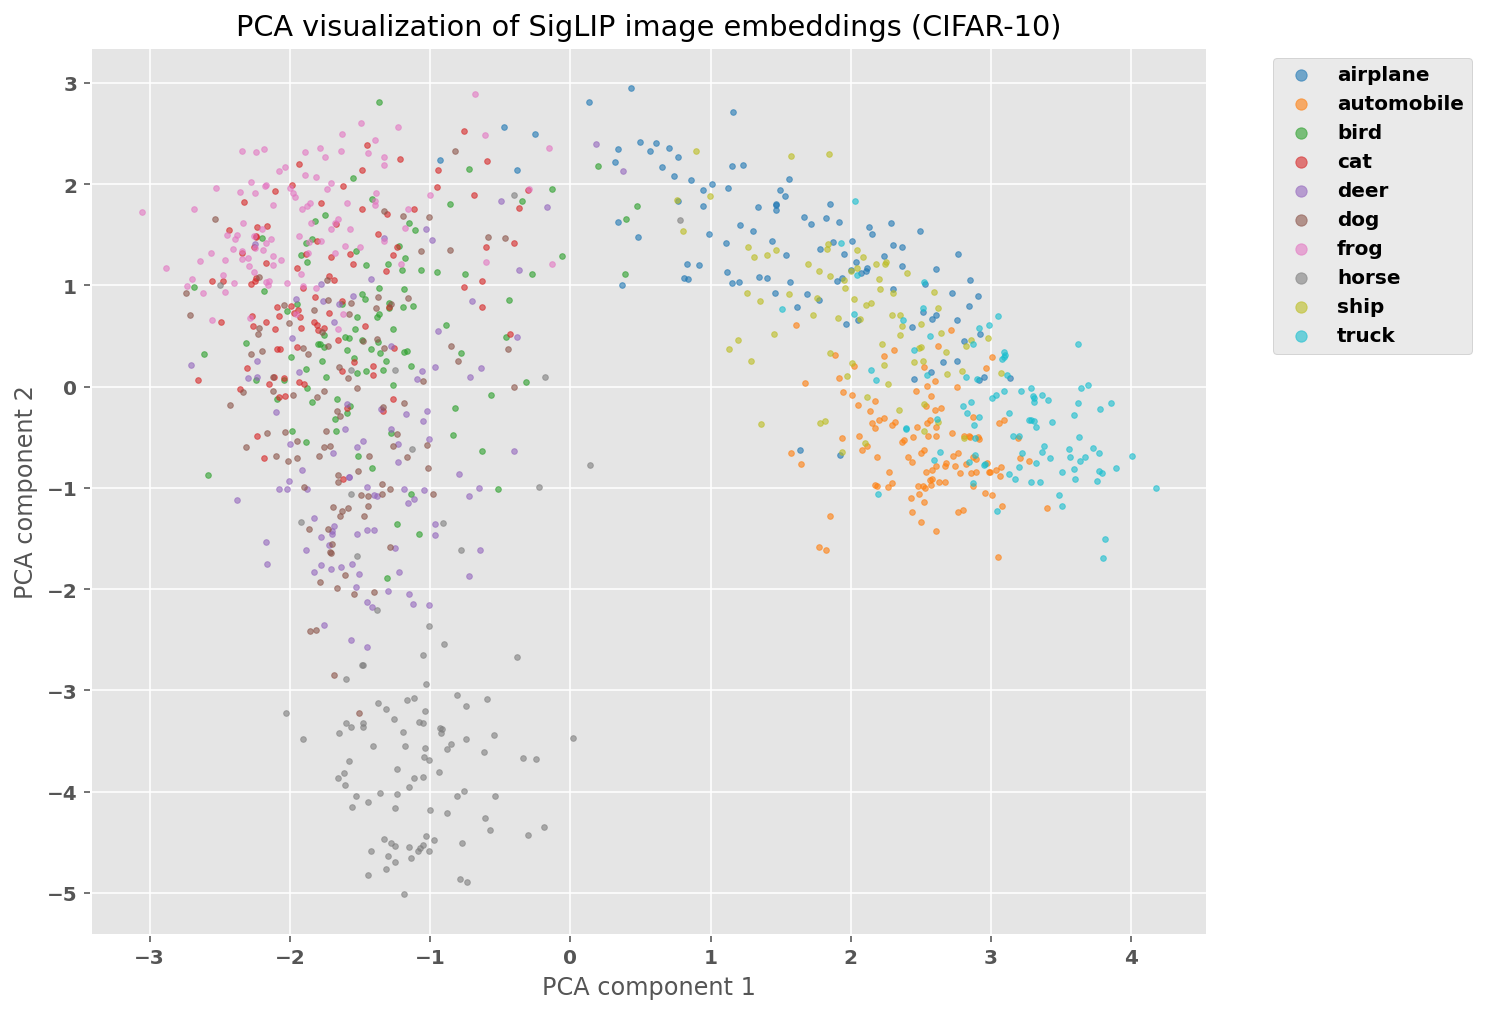

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_embeddings = pca.fit_transform(np.array(siglip_image_embeddings))

plt.figure(figsize=(10, 8))
unique_labels = sorted(set(image_labels))
cmap = plt.cm.get_cmap("tab10", len(unique_labels))

for i, label in enumerate(unique_labels):
    indices = [j for j, lbl in enumerate(image_labels) if lbl == label]
    plt.scatter(
        pca_embeddings[indices, 0],
        pca_embeddings[indices, 1],
        color=cmap(i),
        label=label,
        alpha=0.6,
        s=8,
    )

plt.title("PCA visualization of SigLIP image embeddings (CIFAR-10)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

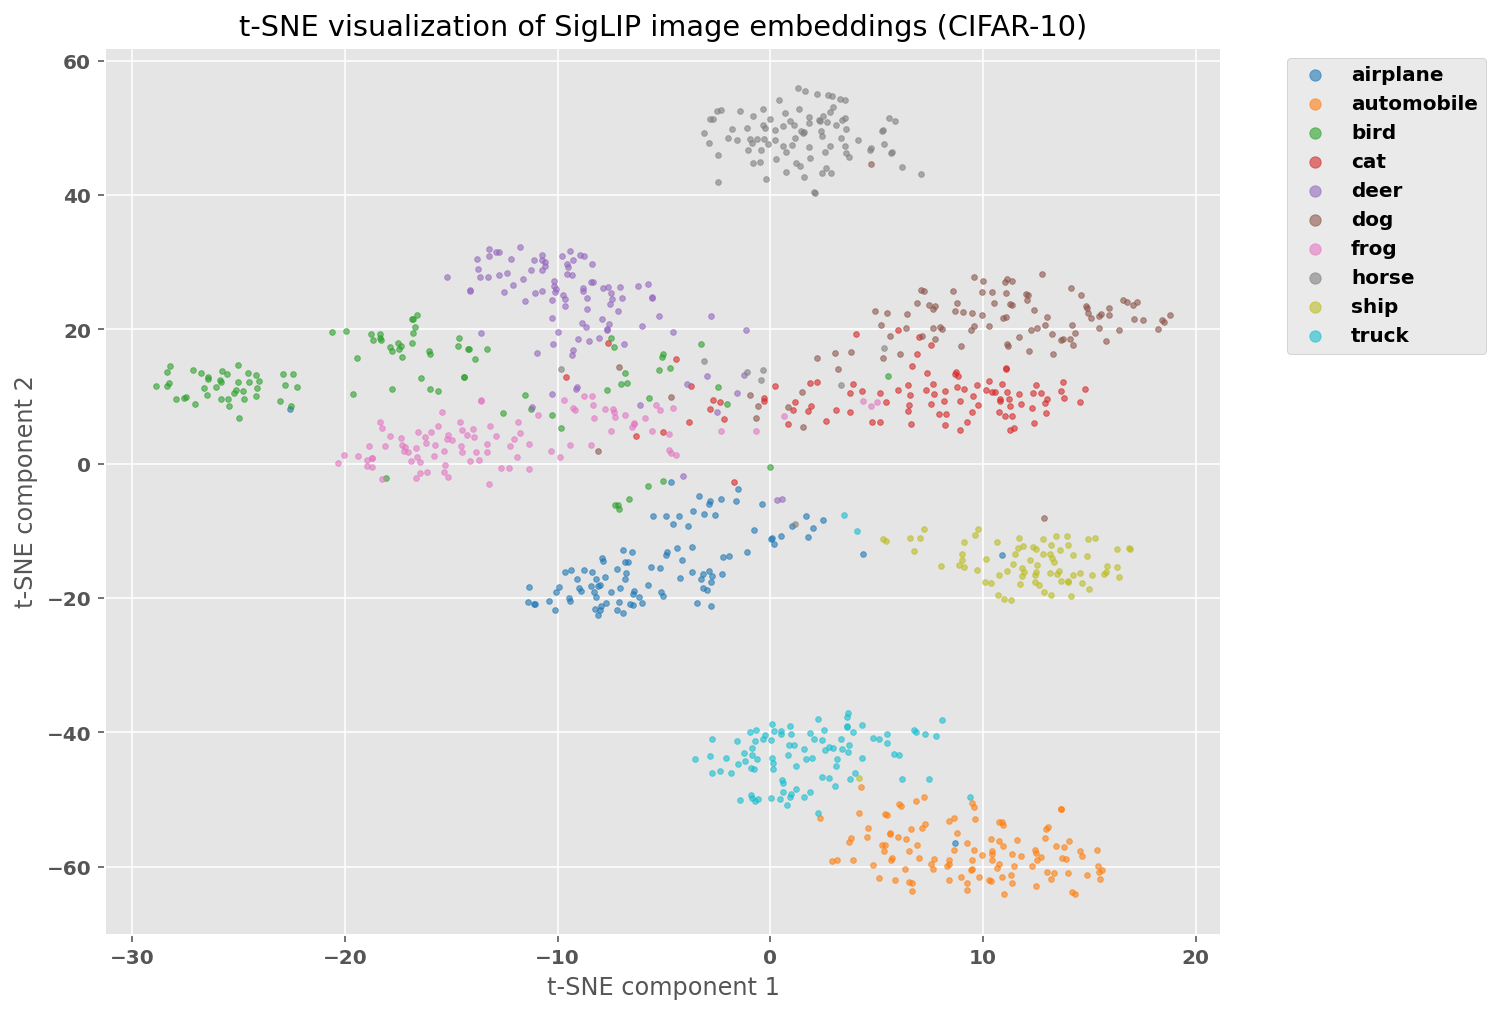

In [6]:
from sklearn.manifold import TSNE

siglip_tsne = TSNE(n_components=2, random_state=42, init="random", learning_rate="auto")
siglip_tsne_embeddings = siglip_tsne.fit_transform(np.array(siglip_image_embeddings))

plt.figure(figsize=(10, 8))
unique_labels = sorted(set(image_labels))
cmap = plt.cm.get_cmap("tab10", len(unique_labels))

for i, label in enumerate(unique_labels):
    indices = [j for j, lbl in enumerate(image_labels) if lbl == label]
    plt.scatter(
        siglip_tsne_embeddings[indices, 0],
        siglip_tsne_embeddings[indices, 1],
        color=cmap(i),
        label=label,
        alpha=0.6,
        s=8,
    )

plt.title("t-SNE visualization of SigLIP image embeddings (CIFAR-10)")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

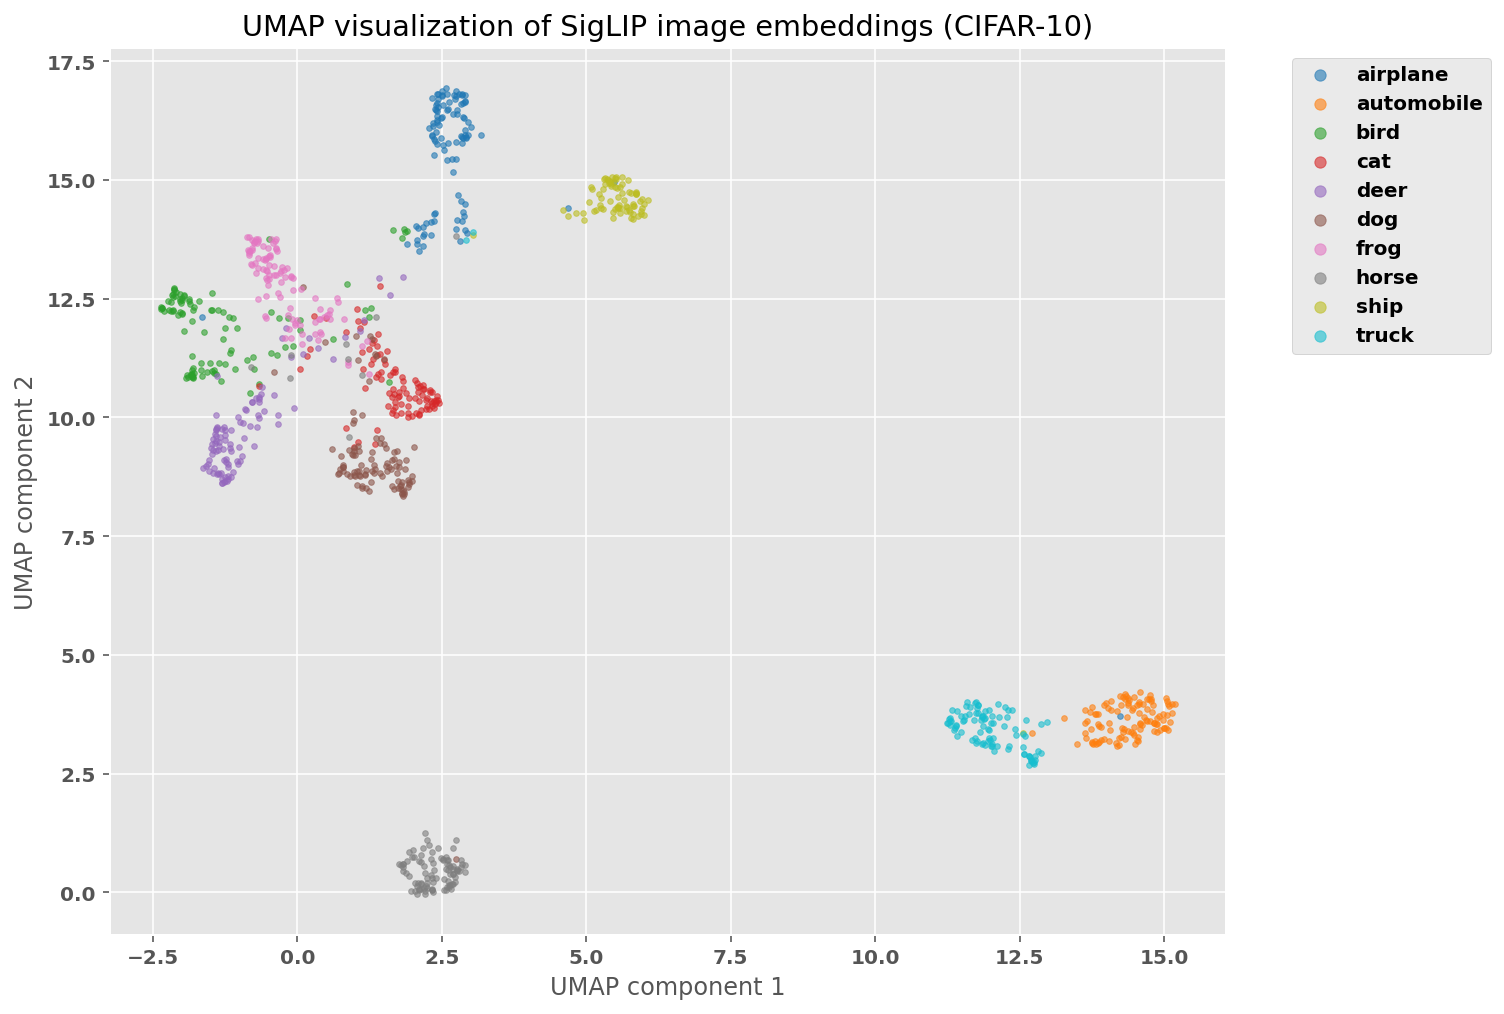

In [7]:
import umap

siglip_umap = umap.UMAP(n_components=2, random_state=42)
siglip_umap_embeddings = siglip_umap.fit_transform(np.array(siglip_image_embeddings))

plt.figure(figsize=(10, 8))
unique_labels = sorted(set(image_labels))
cmap = plt.cm.get_cmap("tab10", len(unique_labels))

for i, label in enumerate(unique_labels):
    indices = [j for j, lbl in enumerate(image_labels) if lbl == label]
    plt.scatter(
        siglip_umap_embeddings[indices, 0],
        siglip_umap_embeddings[indices, 1],
        color=cmap(i),
        label=label,
        alpha=0.6,
        s=8,
    )

plt.title("UMAP visualization of SigLIP image embeddings (CIFAR-10)")
plt.xlabel("UMAP component 1")
plt.ylabel("UMAP component 2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()